In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['PG', '^GSPC']      #Create a list
data = pd.DataFrame()

for a in assets:
    data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [6]:
data.head()

,PG,^GSPC
Date,,
2010-01-04,47.838852,1132.989990
2010-01-05,47.854511,1136.520020
2010-01-06,47.627529,1137.140015
2010-01-07,47.369236,1141.689941
2010-01-08,47.306614,1144.979980


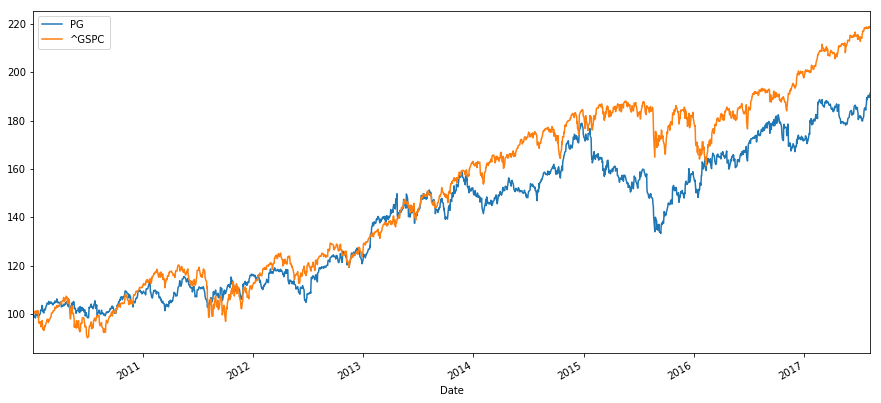

In [9]:
(data / data.iloc[0] * 100).plot(figsize = (15, 7))
plt.show()

In [11]:
log_returns = np.log(data / data.shift(1))     #Calculate log returns for securities in the list
log_returns.head()

,PG,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.003111
2010-01-06,-0.004754,0.000545
2010-01-07,-0.005438,0.003993
2010-01-08,-0.001323,0.002878


In [13]:
log_returns.mean() * 250

PG       0.084908
^GSPC    0.102164
dtype: float64

In [14]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.019557,0.011963
^GSPC,0.011963,0.022468


In [15]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.570678
^GSPC,0.570678,1.000000


In [21]:
log_returns.std()

PG       0.008845
^GSPC    0.009480
dtype: float64

In [24]:
num_assets = len(assets)
num_assets

2

In [25]:
weights = np.random.random(num_assets)       # create an array for weights
weights /= np.sum(weights)       # w = weight /total weight
weights

array([ 0.25352825,  0.74647175])

In [26]:
weights[0] + weights[1]

1.0

In [31]:
np.sum(weights * log_returns.mean()) * 250  #Calculate Portf expected return

0.041226841441219936

In [33]:
Portf_variance = np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))   # Calculate Portf variance
Portf_variance

0.0033454384656545124

In [2]:
Portf_stdv = np.sqrt(Portf_variance)
Portf_stdv

NameError: name 'Portf_variance' is not defined

In [48]:
Portfolio_returns = []      #Create a loop to simulate 10,000 scenarios for portfolio returns and volatilities
Portfolio_vol = [] 

for x in range(10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    Portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    Portfolio_vol.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
Portfolio_returns, Portfolio_vol

([0.09700861967368721,
  0.09538018038211651,
  0.09122389325375645,
  0.08726626881991821,
  0.09376523232660848,
  0.09071113522021015,
  0.08752383464251406,
  0.0933306539368994,
  0.08887197389915535,
  0.09263881897922695,
  0.09950877433264153,
  0.09600063944253118,
  0.10029872417788614,
  0.09547675965724503,
  0.09462200237756573,
  0.09514425216515618,
  0.09034628654177713,
  0.09920915515209962,
  0.08524109215328987,
  0.09459516171989643,
  0.09182471546472155,
  0.09105021776432402,
  0.09889733554369524,
  0.1001906938044648,
  0.09324594037108769,
  0.09459459358826747,
  0.08760905431138183,
  0.08951276122959442,
  0.09218780856281536,
  0.08590318901329722,
  0.08496096386442853,
  0.09920274209924089,
  0.09314603354241617,
  0.10034052568166116,
  0.08568449826222582,
  0.0916771186176844,
  0.09450313175360375,
  0.1000154226021314,
  0.10185842490136664,
  0.09900995865499,
  0.0899976204660857,
  0.09167421416522302,
  0.09451114774983777,
  0.100485711944948

In [50]:
Portfolio_returns = np.array(Portfolio_returns)      #Put results into an array
Portfolio_vol = np.array(Portfolio_vol)

Portfolio_returns, Portfolio_vol

(array([ 0.09700862,  0.09538018,  0.09122389, ...,  0.09557015,
         0.09349495,  0.09422583]),
 array([ 0.13344197,  0.13040579,  0.12815041, ...,  0.13070008,
         0.128378  ,  0.12896926]))

In [56]:
portfolios = pd.DataFrame({'Returns' : Portfolio_returns, 'Volatility' : Portfolio_vol})     #Turn the array into a table
portfolios.tail()

,Returns,Volatility
9995,0.095707,0.130922
9996,0.093041,0.128137
9997,0.095570,0.130700
9998,0.093495,0.128378
9999,0.094226,0.128969


In [57]:
portfolios.head()

,Returns,Volatility
0,0.097009,0.133442
1,0.095380,0.130406
2,0.091224,0.128150
3,0.087266,0.133489
4,0.093765,0.128568


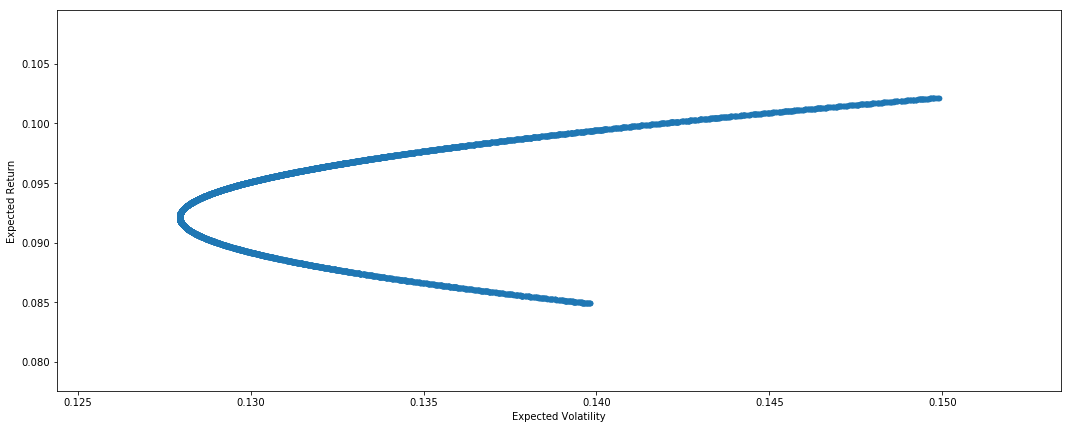

In [63]:
portfolios.plot(x='Volatility', y='Returns', kind = 'scatter', figsize=(18,7));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')